In [420]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [421]:
df = pd.read_csv(r"C:\Users\apurv\Desktop\NTU_YEAR_4\CZ4032\Project\Breast Cancer Prediction.csv")
df.head()
df.shape

(683, 11)

In [422]:
# find identical data
duplicate_bool = df.duplicated(keep='first')
duplicate = df.loc[duplicate_bool == True]

df = df[~df.isin(duplicate)].dropna()
df.shape

(675, 11)

In [423]:
#drop sample code column
del df["Sample code number"]
#del df["Uniformity of Cell Size"]
#del df["Uniformity of Cell Shape"]
#del df["Single Epithelial Cell Size"]
#del df["Bland Chromatin"]
df.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,B
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,B
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,B
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,B
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,B


In [424]:
#Lets seprate labels and features
x=df.drop(columns=['Class'])
y=df['Class']

In [425]:
from sklearn.preprocessing import LabelEncoder
#Convert string labels to unique int number
lbl=LabelEncoder()
y=lbl.fit_transform(y)
y[:20]
#Here we can see M convert 1 and B convert to 0

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [426]:
from imblearn.over_sampling import SMOTE, ADASYN

#Spilt the train and test data

from sklearn.model_selection import train_test_split

#using 20% of dataframe as test data
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5, stratify = y)

#check the size before beginning
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((540, 9), (135, 9), (540,), (135,))

In [427]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=5)
x_train, y_train = sm.fit_resample(x_train, y_train)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((702, 9), (135, 9), (702,), (135,))

In [428]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

print("Gaussian Naive Bayes Results!\n")
#Naivye Bayes
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Training accuracy: ", nb.score(x_train, y_train))
y_pred=nb.predict(x_test)

ac=accuracy_score(y_test,y_pred)
print("\nTest Accuracy:", ac)

rc=roc_auc_score(y_test,y_pred)
print("\nROC_AUC Score:", rc)

#cross validation
#result=cross_validate(nb,x_train,y_train,scoring=scoring,cv=10)
#print("\nCross Validate function:")
#display_result(result)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("\nConfusion matrix:\n", cm,"\n")
print("True Positive (Correctly predicting malignant): ", tp)
print("True Negative (Correctly prediciting benign): ", tn)
print("False Positive (Wrongly predicitng malignant, when actually benign): ", fp)
print("False Negative (Wrongly predicting benign, when actually malignant): ", fn)

print("\nClassification Report:")
#Check precision, recall, f1-score
print(classification_report(y_test, y_pred))
#Another way to get the models accuracy on the test data
#print(accuracy_score(y_test, y_pred))

Gaussian Naive Bayes Results!

Training accuracy:  0.9544159544159544

Test Accuracy: 0.9777777777777777

ROC_AUC Score: 0.9779980657640233

Confusion matrix:
 [[86  2]
 [ 1 46]] 

True Positive (Correctly predicting malignant):  46
True Negative (Correctly prediciting benign):  86
False Positive (Wrongly predicitng malignant, when actually benign):  2
False Negative (Wrongly predicting benign, when actually malignant):  1

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        47

    accuracy                           0.98       135
   macro avg       0.97      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



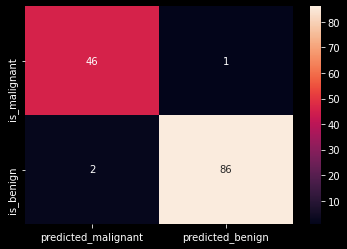

In [429]:
plt.style.use('dark_background')

cm = np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_malignant','is_benign'], columns=['predicted_malignant','predicted_benign'])
fig = sns.heatmap(confusion,annot=True)
fig.FontColor = 'white'
figure = fig.get_figure()
